In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import random
import matplotlib.pyplot as plt
import PIL
from PIL import ImageEnhance
import os

In [22]:
random.seed(42)
directory = './jpegs_cropped/X-Ray/bodyply_cropped_grayscale2/'
directory_2 = './jpegs_cropped/X-Ray/nondefect_cropped_grayscale2/'
directories = [directory, directory_2]


def get_images(directories):
    images = []
    # iterate over files in
    # that directory
    count = 0
    for directory in directories:
        for filename in os.listdir(directory):
            f = os.path.join(directory, filename)
            # checking if it is a file
            if os.path.isfile(f):
                image = PIL.Image.open(f)
                #image_enhancer = ImageEnhance.Color(image)
                #image_recoloured = image_enhancer.enhance(np.random.uniform(0, 5))
                image_greyscale = image.convert('L')
                image_resized = image_greyscale.resize((345, 825))
                enhancer = ImageEnhance.Contrast(image_resized)
                factor = np.random.uniform(0.5, 5)
                # image_contrasted = enhancer.enhance(factor)
                image_array = np.array(image_resized)
                images.append(image_array)
        #count += 1
    return images

images = get_images(directories)

In [23]:
print(images[0].flatten().shape)

def image_flatten(images):
    flattened_images = np.zeros((1, len(images[0].flatten())))
    count = 0
    for image in images:
        flattened_image = np.reshape(image.flatten(), (1, (image.shape[0] * image.shape[1])))
        flattened_images = np.append(flattened_images, flattened_image, 0)
        count += 1
    return flattened_images


flattened_images = image_flatten(images)
flattened_images_crop = flattened_images[1::, :]
print(np.shape(flattened_images))

(284625,)
(221, 284625)


In [24]:
print(images[0].flatten().shape)

def image_flatten(images):
    flattened_images = np.zeros((1, len(images[0].flatten())))
    count = 0
    for image in images:
        flattened_image = np.reshape(image.flatten(), (1, (image.shape[0] * image.shape[1])))
        flattened_images = np.append(flattened_images, flattened_image, 0)
        count += 1
    return flattened_images


flattened_images = image_flatten(images)
flattened_images_crop = flattened_images[1::, :]
print(np.shape(flattened_images))

(284625,)
(221, 284625)


(221, 284625)


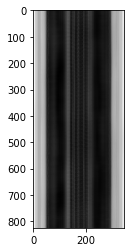

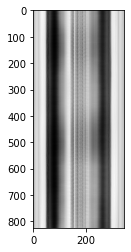

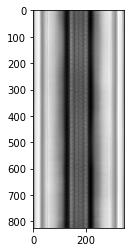

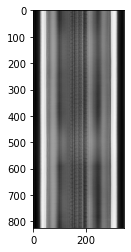

In [26]:
scaled_images = StandardScaler().fit_transform(flattened_images)
print(scaled_images.shape)
pca = PCA(n_components = 4, random_state=200206323).fit(scaled_images)
#cov_matrix = np.dot(scaled_images.T, scaled_images) / len(scaled_images)
for eigenvector in pca.components_:
    ##print('eigenvalue:', np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)))
    eigenvector = eigenvector.reshape(825, 345)
    plt.imshow(eigenvector, cmap='gray')
    plt.show()

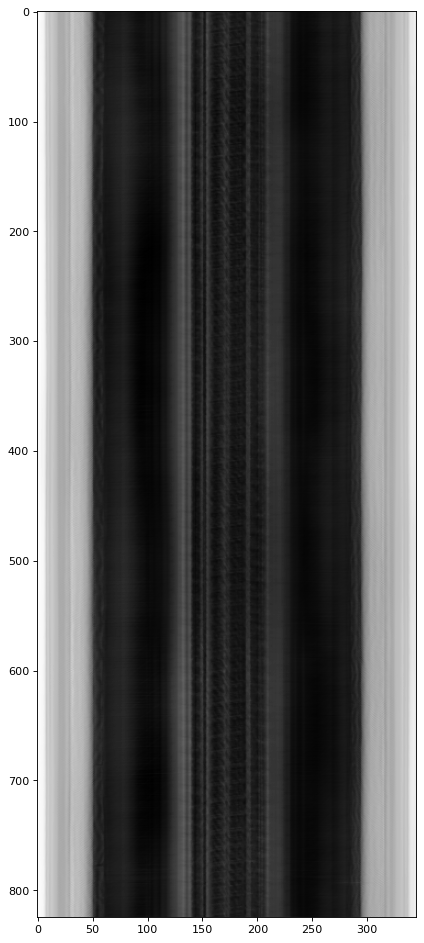

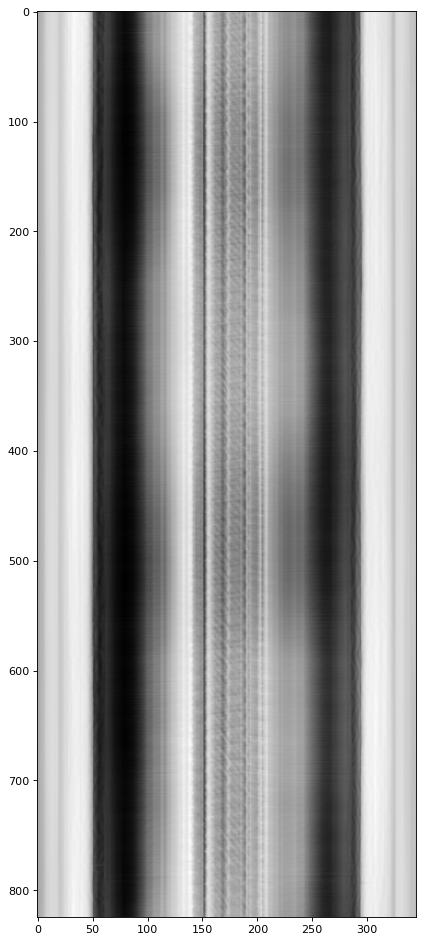

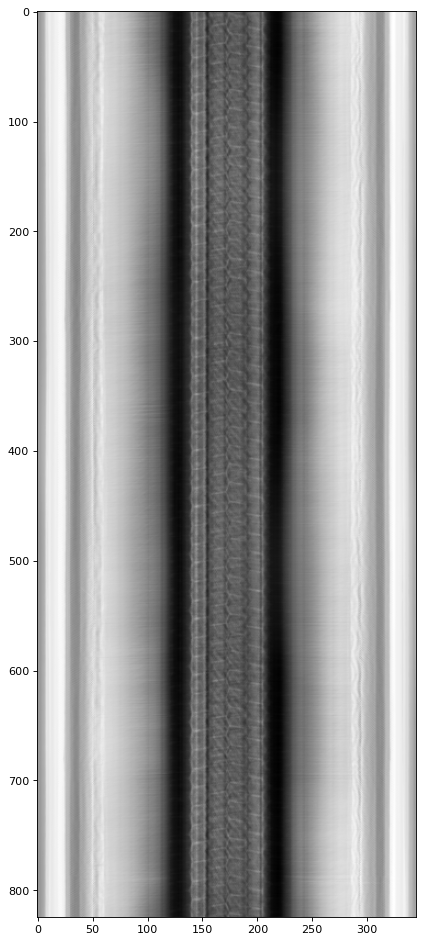

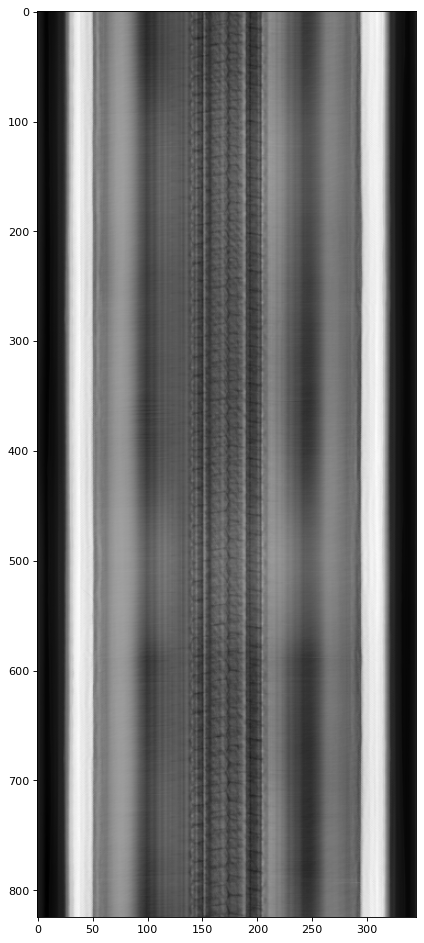

In [27]:
from matplotlib.pyplot import figure

for eigenvector in pca.components_:
    ##print('eigenvalue:', np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)))
    figure(figsize=(20, 15), dpi=80)
    eigenvector = eigenvector.reshape(825, 345)
    plt.imshow(eigenvector, cmap='gray')
    plt.show()

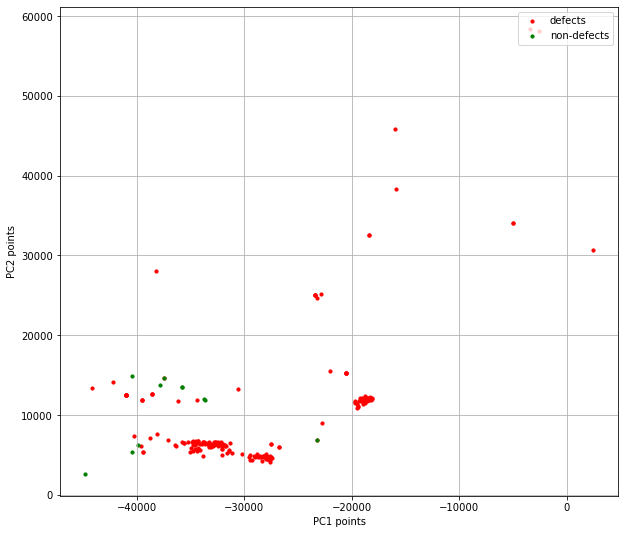

In [18]:
nondefect_dim1 = []
nondefect_dim2 = []
defect_dim1 = []
defect_dim2 = []
mean_image = np.mean(scaled_images, axis=0)
count = 0
for image in images:
    if count < 11:
        nondefect_dim1.append(np.dot(pca.components_[0].T, (image.reshape(284625,) - mean_image)))
        nondefect_dim2.append(np.dot(pca.components_[1].T, (image.reshape(284625,) - mean_image)))
    else:
        defect_dim1.append(np.dot(pca.components_[0].T, (image.reshape(284625,) - mean_image)))
        defect_dim2.append(np.dot(pca.components_[1].T, (image.reshape(284625,) - mean_image)))
    count += 1
plt.figure(figsize=(10,9))
plt.scatter(defect_dim1, defect_dim2, color='r', s=10, label='defects')
plt.scatter(nondefect_dim1, nondefect_dim2, color='g', s=10, label='non-defects')
plt.grid()
plt.xlabel('PC1 points')
plt.ylabel('PC2 points')
plt.legend(loc="upper right")
plt.show()

In [25]:
array = [[1, 1, 1, 1], [2, 2, 2, 2], [3, 3, 3, 3]]
print(np.mean(array, axis=0))

[2. 2. 2. 2.]


In [ ]:

no_label_data = StandardScaler().fit_transform(no_label_data)
pca = PCA(n_components = 24, random_state=200206323).fit(no_label_data)
cov_matrix = np.dot(no_label_data.T, no_label_data) / len(no_label_data)
for eigenvector in pca.components_:
    print('eigenvalue:', np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)))
    eigenvector = eigenvector.reshape(28, 28)
    plt.imshow(eigenvector, cmap=cm.gray)
    plt.show()